Let $K$ be number of sample and $N$ is number of batch size.

**data set:** $D = {(x_1,y_1), \ldots, (x_K, y_K)}$

**Parameters:** $w, b$

**Hyperparameters:** $N, \eta$

$$w^*, b^* = \underset{w,b}{\operatorname{argmin}}l(w, b)$$

![](flowtrain.png)

# Example

In [1]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Data(Dataset):
    def __init__(self, train=True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = -3 * self.x + 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
    
        if train == True:
            self.y[0] = 0
            self.y[50:55] = 20
        else:
            pass
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [3]:
train_data = Data()
val_data = Data(train=False)

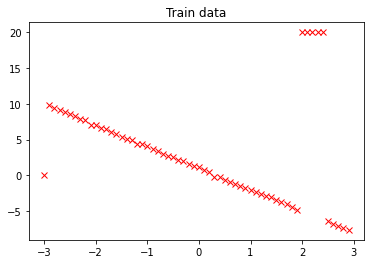

In [4]:
plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'rx')
plt.title('Train data')
plt.show()

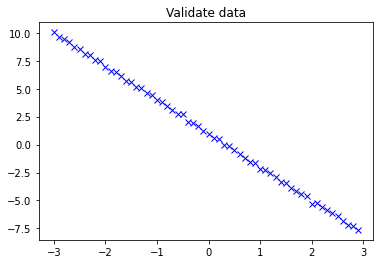

In [5]:
plt.plot(val_data.x.numpy(), val_data.y.numpy(), 'bx')
plt.title('Validate data')
plt.show()

In [6]:
criterion = nn.MSELoss()

In [7]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [8]:
trainloader = DataLoader(dataset = train_data, batch_size = 1)

In [9]:
epochs = 10
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
validation_error = torch.zeros(len(learning_rates))
test_error = torch.zeros(len(learning_rates))

MODELS = []

In [10]:
for i, learning_rate in enumerate(learning_rates):
    
    model = LR(1, 1)
    optimizer = optim.SGD(model.parameters(), lr = learning_rate)
    
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
    yhat = model(train_data.x)
    loss = criterion(yhat, train_data.y)
    test_error[i] = loss.item()
    
    yhat = model(val_data.x)
    loss = criterion(yhat, val_data.y)
    validation_error[i] = loss.item()
    
    MODELS.append(model)

In [11]:
test_error

tensor([55.3434, 43.9179, 43.3290, 72.3921,     nan])

In [12]:
validation_error

tensor([19.9599, 11.3231, 10.6656,  4.7692,     nan])

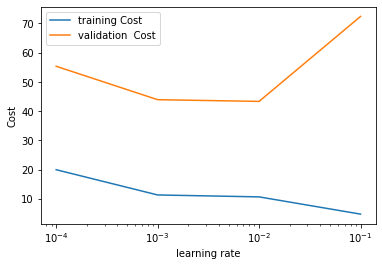

In [13]:
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label='training Cost')
plt.semilogx(np.array(learning_rates), test_error.numpy(), label='validation  Cost')
plt.xlabel('learning rate')
plt.ylabel('Cost')
plt.legend()
plt.show()

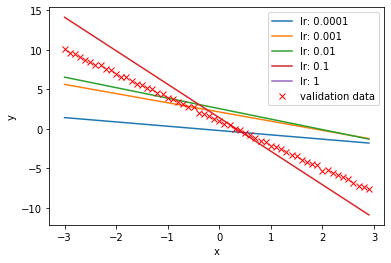

In [15]:
for model, learning_rate in zip(MODELS, learning_rates):
    
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = f'lr: {learning_rate}')

plt.plot(val_data.x.numpy(), val_data.y.numpy(), 'xr', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()